C:\Users\Juan Valenzuela\AppData\Local\Temp\ipykernel_8248\1667639628.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ones'] = 1
C:\Users\Juan Valenzuela\AppData\Local\Temp\ipykernel_8248\1667639628.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col + '^' + str(i)] = X[col] ** i
C:\Users\Juan Valenzuela\AppData\Local\Temp\ipykernel_8248\1667639628.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Error cuadrático medio (MSE): 18831.143981218094
Coeficiente de determinación (R^2): 0.8521220918238812


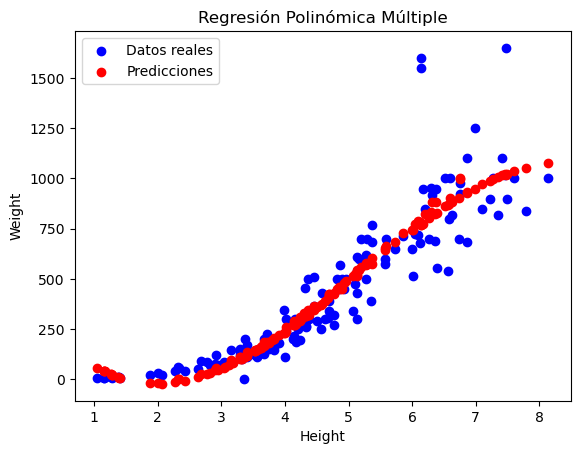

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga el conjunto de datos
df = pd.read_csv('p6.csv')

# Selecciona las variables independientes y dependientes
X = df[['Height', 'Width']]
y = df['Weight']

# Agrega una columna de unos (para el término independiente)
X['ones'] = 1

# Grado del polinomio
degree = 3

# Crea las características polinómicas
for i in range(2, degree+1):
    for col in ['Height', 'Width']:
        X[col + '^' + str(i)] = X[col] ** i

# Convierte los DataFrames en matrices NumPy
X = X.to_numpy()
y = y.to_numpy()

# Calcula los coeficientes del modelo
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Realiza predicciones en el conjunto de datos de entrenamiento
y_pred = X.dot(coefficients)

# Calcula el error cuadrático medio (MSE)
mse = ((y - y_pred) ** 2).mean()

# Calcula el coeficiente de determinación (R^2)
mean_y = np.mean(y)
sst = ((y - mean_y) ** 2).sum()
ssr = ((y - y_pred) ** 2).sum()
r2 = 1 - (ssr / sst)

# Imprime las métricas de rendimiento
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

# Visualiza la regresión polinómica
plt.scatter(X[:, 1], y, color='blue', label='Datos reales')
plt.scatter(X[:, 1], y_pred, color='red', label='Predicciones')
plt.title('Regresión Polinómica Múltiple')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()
